In [2]:
# S-Function is also known as sigmoid function 
# Used for Binary classification an activation function and covert the values into 1 and 0 
# Added for the non linearity in a model 
# Basics of Image Classification using Python 
# Binary = Black and White
# Multi = RGB
# Pixels = points in an Image which gives the resolution of the image / cordinates, shapes, edges(Smallest Unit of an Image)
# Covert Image into Numeric values
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 




In [3]:
#import online data
from sklearn.datasets import load_digits
digits = load_digits()

In [10]:
#Input variable and features (X)
digits.data.shape
X = digits.data
# 1797 pictures of 8*8

In [11]:
# Output lables (y)
digits.target.shape
y = digits.target

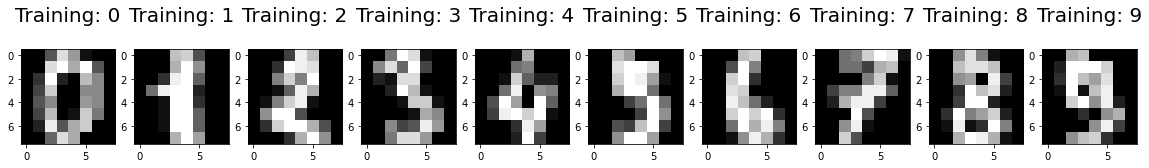

In [12]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize=20)

In [36]:
#split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
print("Train input data ", X_train.shape)

Train input data  (1437, 64)


In [38]:
#Model train
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Sartaj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
pridict = model.predict(X_test[0:10])
pridict

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [40]:
# Accuracy test 
Score = model.score(X_test,y_test)
print("Accuracy of our model: ", Score*100, "percent")

Accuracy of our model:  96.66666666666667 percent


In [41]:
# Confusion matrices
from sklearn.metrics import confusion_matrix
pridict = model.predict(X_test)
cm = confusion_matrix(y_test,pridict)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score :0.9666666666666667')

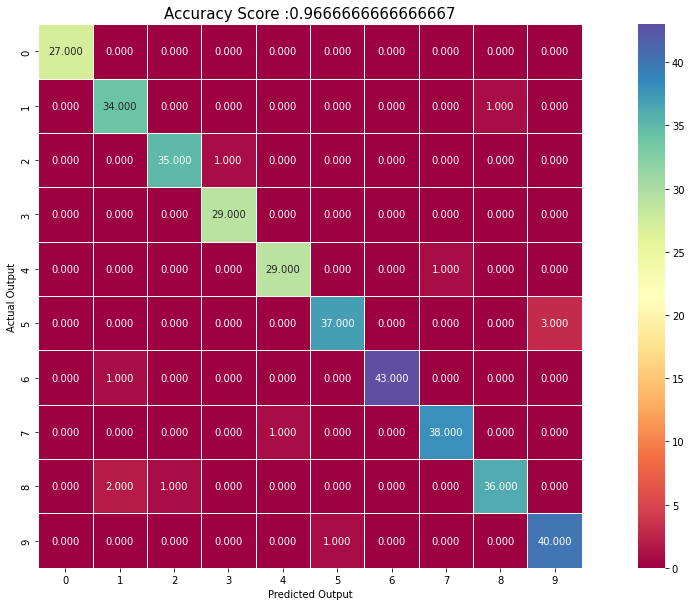

In [42]:
import seaborn as sns
plt.figure(figsize=(20,10)) 
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Spectral")
plt.ylabel("Actual Output")
plt.xlabel("Predicted Output")
all_sample_title = 'Accuracy Score :{0}'.format(Score)
plt.title(all_sample_title, size = 15)

In [43]:
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


In [45]:
index = 0 
misclassifiedIndexes = []
for label, predict in zip(y_test,pridict):
    if label!= predict:
        misclassifiedIndexes.append(index)
        index+=1
print(index)

12


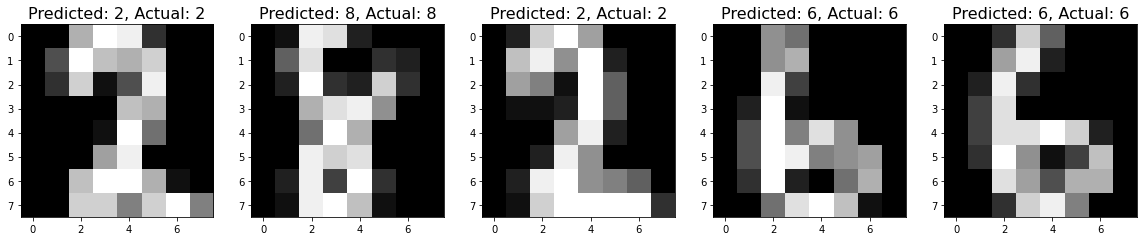

In [59]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(X_test[badIndex],(8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(pridict[badIndex], y_test[badIndex]), fontsize=16)